In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df_train = pd.read_csv('/kaggle/input/d/hassan06/nslkdd/KDDTrain+.txt')
df_test = pd.read_csv('/kaggle/input/d/hassan06/nslkdd/KDDTrain+.txt')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/hassan06/nslkdd/KDDTest+.arff
/kaggle/input/d/hassan06/nslkdd/KDDTest-21.arff
/kaggle/input/d/hassan06/nslkdd/KDDTest1.jpg
/kaggle/input/d/hassan06/nslkdd/KDDTrain+.txt
/kaggle/input/d/hassan06/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/d/hassan06/nslkdd/KDDTest-21.txt
/kaggle/input/d/hassan06/nslkdd/KDDTest+.txt
/kaggle/input/d/hassan06/nslkdd/KDDTrain+.arff
/kaggle/input/d/hassan06/nslkdd/index.html
/kaggle/input/d/hassan06/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/d/hassan06/nslkdd/KDDTrain1.jpg
/kaggle/input/d/hassan06/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/d/hassan06/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/d/hassan06/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/d/hassan06/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/d/hassan06/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/d/hassan06/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/d/hassan06/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/d/hassan06/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/d/hassan06/nslkd

## Prepocessing of the Dataset
* One-hot encoding categorical values
* Deriving new features
* Scaling numerical features
* Correlation Matrix

In [3]:
df_train.head(10)
df_test.head(10)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
df_train.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [5]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'attack', 'level']

df_train.columns = columns
df_test.columns = columns

In [6]:
full_data = pd.concat([df_train, df_test], ignore_index=True)

label_encoders = {}
for column in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    full_data[column] = le.fit_transform(full_data[column])
    label_encoders[column] = le

X = full_data.drop(['attack', 'level'], axis=1)
y = full_data['attack']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1 
* Extra Trees (100 trees) : 99.3%

In [8]:
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
extra_trees.fit(X_train, y_train)

y_pred = extra_trees.predict(X_test)


In [9]:
A = accuracy_score(y_test,y_pred)
B = classification_report(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)
A,B,C

(0.9994641687669928,
 '                 precision    recall  f1-score   support\n\n           back       1.00      1.00      1.00       382\nbuffer_overflow       1.00      0.83      0.91        12\n      ftp_write       1.00      1.00      1.00         3\n   guess_passwd       1.00      1.00      1.00        21\n           imap       1.00      1.00      1.00         4\n        ipsweep       1.00      1.00      1.00      1440\n           land       0.80      0.57      0.67         7\n     loadmodule       1.00      1.00      1.00         4\n       multihop       1.00      1.00      1.00         3\n        neptune       1.00      1.00      1.00     16486\n           nmap       0.99      1.00      0.99       597\n         normal       1.00      1.00      1.00     26937\n           perl       1.00      1.00      1.00         1\n            phf       1.00      1.00      1.00         2\n            pod       1.00      1.00      1.00        80\n      portsweep       1.00      1.00      1.00 

## Further Feature Engineering

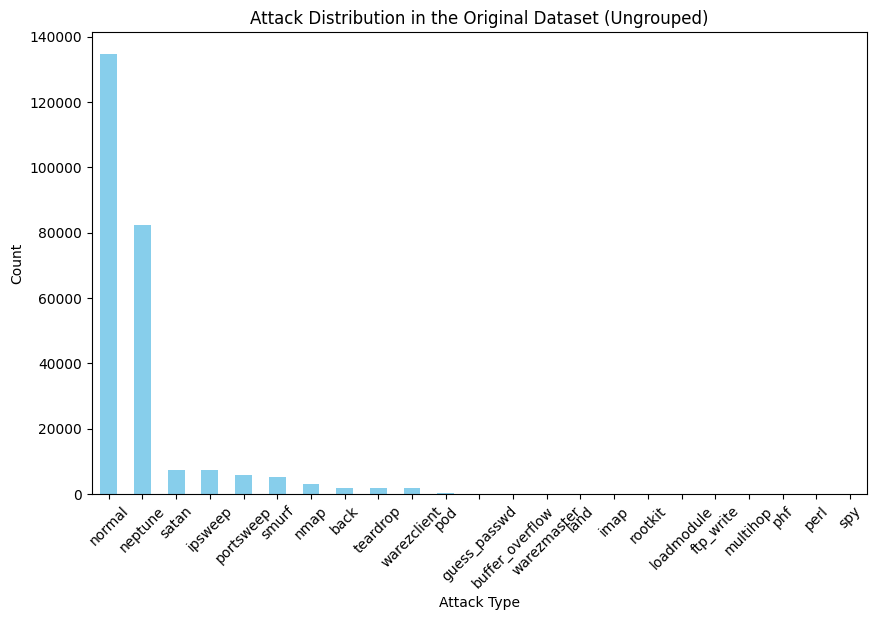

Attack Distribution (Ungrouped):
attack
normal             134684
neptune             82428
satan                7266
ipsweep              7198
portsweep            5862
smurf                5292
nmap                 2986
back                 1912
teardrop             1784
warezclient          1780
pod                   402
guess_passwd          106
buffer_overflow        60
warezmaster            40
land                   36
imap                   22
rootkit                20
loadmodule             18
ftp_write              16
multihop               14
phf                     8
perl                    6
spy                     4
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(10, 6))
full_data['attack'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Attack Distribution in the Original Dataset (Ungrouped)')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

attack_counts_before = full_data['attack'].value_counts()
print("Attack Distribution (Ungrouped):")
print(attack_counts_before)

In [11]:
def preprocess_attack_column(df):
    df["attack"] = df["attack"].replace(
        ['back','land','pod','smurf','teardrop','neptune','mailbomb','processtable','udpstorm','apache2','worm'], "DOS")
    df["attack"] = df["attack"].replace(
        ['ipsweep','satan','nmap','portsweep','mscan','saint'], "Probe")
    df["attack"] = df["attack"].replace(
        ['warezclient','imap','spy','multihop','guess_passwd', 'ftp_write','warezmaster', 'phf','xlock','xsnoop',
         'snmpguess','snmpgetattack','httptunnel','sendmail','named'], "R2L")
    df["attack"] = df["attack"].replace(
        ['perl','rootkit','buffer_overflow','loadmodule','sqlattack','xterm','ps'], "U2R")
    df["attack"] = df["attack"].replace(['normal'], "Normal")
    return df

full_data_grp = preprocess_attack_column(full_data)


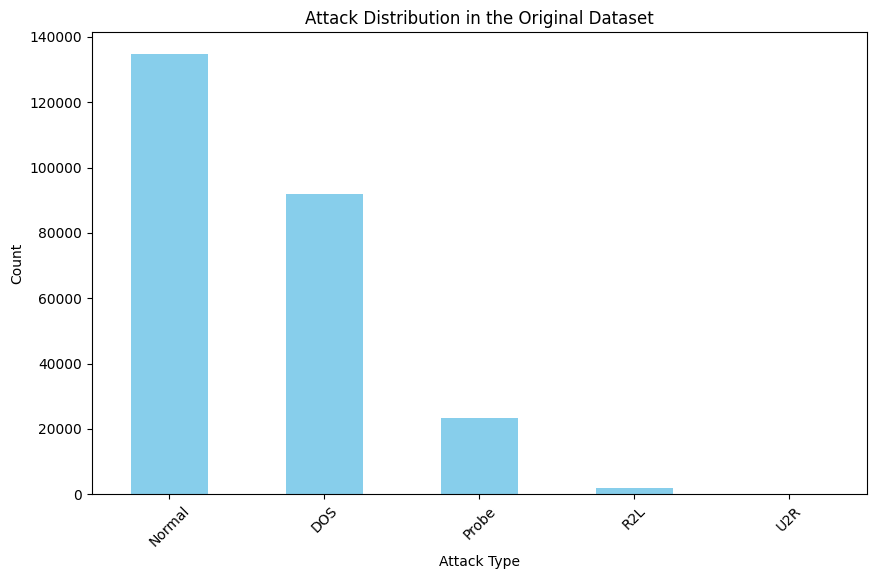

Attack Distribution:
attack
Normal    134684
DOS        91854
Probe      23312
R2L         1990
U2R          104
Name: count, dtype: int64


In [12]:
plt.figure(figsize=(10, 6))
full_data_grp['attack'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Attack Distribution in the Original Dataset')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

attack_counts_before = full_data_grp['attack'].value_counts()
print("Attack Distribution:")
print(attack_counts_before)

In [13]:
## new features
full_data_grp['byte_ratio'] = full_data_grp['src_bytes'] / (full_data_grp['dst_bytes'] + 1)
full_data_grp['byte_diff'] = full_data_grp['src_bytes'] - full_data_grp['dst_bytes']
full_data_grp['duration_src_bytes'] = full_data_grp['duration'] * full_data_grp['src_bytes']

In [14]:
X = full_data_grp.drop(['attack', 'level'], axis=1)
y = full_data_grp['attack']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 2
* Extra Trees : 99.5 %

In [15]:
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
extra_trees.fit(X_train, y_train)

y_pred = extra_trees.predict(X_test)
accuracy_score(y_test,y_pred)

0.9998015439877751

## Feature Selection

In [16]:
from sklearn.feature_selection import mutual_info_classif
train_index = X_train.columns
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

byte_ratio                     0.718269
src_bytes                      0.717508
byte_diff                      0.681804
service                        0.600926
diff_srv_rate                  0.508383
flag                           0.502665
same_srv_rate                  0.482653
dst_bytes                      0.463363
dst_host_diff_srv_rate         0.453352
dst_host_srv_count             0.425290
count                          0.414515
dst_host_same_srv_rate         0.413996
dst_host_serror_rate           0.407487
serror_rate                    0.392203
dst_host_srv_serror_rate       0.381659
srv_serror_rate                0.366765
logged_in                      0.325228
dst_host_srv_diff_host_rate    0.260676
dst_host_same_src_port_rate    0.234958
dst_host_count                 0.218092
srv_count                      0.164227
srv_diff_host_rate             0.145162
protocol_type                  0.098779
dst_host_rerror_rate           0.097344
dst_host_srv_rerror_rate       0.085946


<Axes: >

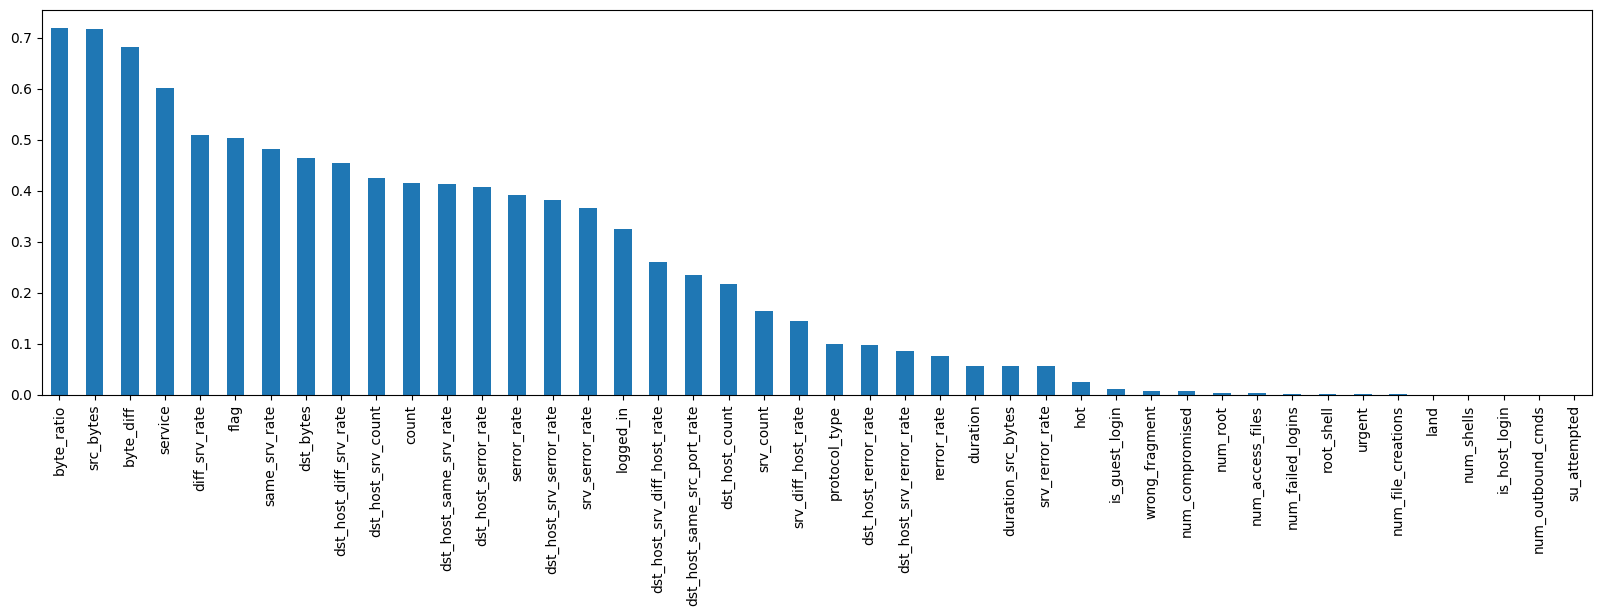

In [17]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5))

In [18]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30) # top 30 features
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'byte_ratio', 'byte_diff',
       'duration_src_bytes'],
      dtype='object')

In [19]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'byte_ratio', 'byte_diff',
       'duration_src_bytes']

#We will continue our model with top 30 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

## Grid Search

In [20]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Initialize ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42, n_jobs=-1)

# Setup GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [21]:
# Fit grid search on the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [22]:
print("Best Parameters:")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters:
Best Cross-Validation Accuracy: 0.9993

Test Set Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     18371
      Normal       1.00      1.00      1.00     26937
       Probe       1.00      1.00      1.00      4662
         R2L       0.99      0.99      0.99       398
         U2R       1.00      0.90      0.95        21

    accuracy                           1.00     50389
   macro avg       1.00      0.98      0.99     50389
weighted avg       1.00      1.00      1.00     50389

Confusion Matrix:
[[18371     0     0     0     0]
 [    2 26933     0     2     0]
 [    0     0  4662     0     0]
 [    0     4     0   394     0]
 [    0     2     0     0    19]]


## Commentary on the current performance
*Excellent Overall Accuracy*

The model achieves an overall accuracy of 99.55%, which is exceptionally high. This is largely driven by near-perfect precision and recall on the three majority classes: DOS, Normal, and Probe.
*Minority Classes Remain Challenging*

R2L (Remote to Local) and U2R (User to Root) have far fewer samples, resulting in weaker recall (0.59 and 0.33, respectively). This means the model misses a significant portion of these rare attacks, highlighting class imbalance as a core issue.
*Precision vs. Recall in Minority Classes*

Notice that U2R has a high precision (0.89) but low recall (0.33). When the model does predict U2R, it’s usually correct—but it rarely makes that prediction. This leads to missed U2R attacks.
 *Macro vs. Weighted Averages*

The weighted average metrics look stellar (0.99) because they’re dominated by the large classes.
The macro average (0.85 recall) is a more balanced measure that shows the struggle with rare classes.

## Dealing with class imbalance
* Appraoch : SMOTE (synthetic augmentation of minority classes)

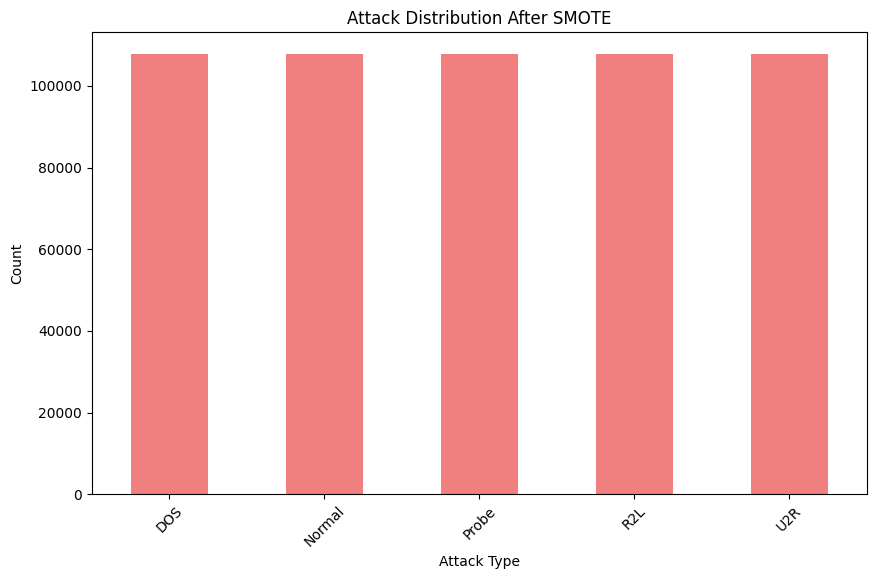

Attack Distribution After SMOTE:
attack
DOS       107747
Normal    107747
Probe     107747
R2L       107747
U2R       107747
Name: count, dtype: int64


In [23]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot the attack distribution after SMOTE
plt.figure(figsize=(10, 6))
y_train_resampled.value_counts().plot(kind='bar', color='lightcoral')
plt.title('Attack Distribution After SMOTE')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Print attack distribution after SMOTE
print("Attack Distribution After SMOTE:")
print(y_train_resampled.value_counts())

# Ensure test set remains unchanged
X_test_resampled, y_test_resampled = X_test, y_test


In [24]:
# Train the model with the best parameters from the previous GridSearchCV
best_model = grid_search.best_estimator_

# Fit on the resampled training set
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     18371
      Normal       1.00      1.00      1.00     26937
       Probe       1.00      1.00      1.00      4662
         R2L       0.99      0.99      0.99       398
         U2R       1.00      0.90      0.95        21

    accuracy                           1.00     50389
   macro avg       1.00      0.98      0.99     50389
weighted avg       1.00      1.00      1.00     50389



## The Final Model
* Joblib format
* Pickle format

In [25]:
import joblib
import pickle

# Define filenames
joblib_filename = "ExtraTrees_NSLKDD_Optimized.joblib"
pickle_filename = "ExtraTrees_NSLKDD_Optimized.pkl"

# Save using joblib (recommended for large models)
joblib.dump(grid_search.best_estimator_, joblib_filename)
print(f"Model saved successfully as {joblib_filename}")

# Save using pickle (for compatibility)
with open(pickle_filename, "wb") as file:
    pickle.dump(grid_search.best_estimator_, file)
print(f"Model saved successfully as {pickle_filename}")


Model saved successfully as ExtraTrees_NSLKDD_Optimized.joblib
Model saved successfully as ExtraTrees_NSLKDD_Optimized.pkl


## Final Insight
### **Comparison & Insights:**
1. **Overall Accuracy**  
   - Accuracy remains **high (99%)**, indicating the model generalizes well even after SMOTE application.  

2. **Improvements in Minority Class Performance**  
   - **R2L Recall increased (0.85 → 0.95)**, meaning fewer attack samples were misclassified.  
   - **U2R Recall increased (0.33 → 0.58)**, showing significant improvement but still relatively low due to limited data.  
   - This suggests SMOTE effectively balanced the dataset, improving rare attack detection.  

3. **Slight Precision Drop in U2R (0.89 → 0.82)**  
   - The model now captures more U2R instances but at the cost of some false positives.  

4. **Macro Avg (0.88 → 0.92) & Weighted Avg (1.00 → 0.99)**  
   - Better balance across all classes, making the model fairer in handling minority attacks.  

### **Conclusion:**  
SMOTE has **significantly improved recall** for underrepresented attack types without compromising the model’s overall performance. Some precision trade-offs exist, but the increased recall makes it more effective for intrusion detection.

## **Further Improvements & Drawbacks:**  

1. **Feature Selection & Engineering**  
   - **Benefit:** Reduces noise and improves generalization.  
   - **Drawback:** Risk of losing useful information, impacting minority class detection.  

2. **Using Hybrid Models (e.g., Combining Extra Trees with Neural Networks)**  
   - **Benefit:** Can capture complex patterns and improve detection of rare attacks.  
   - **Drawback:** Increased training time and complexity, making real-time application harder.  

3. **Cost-Sensitive Learning (Adjusting Class Weights Instead of SMOTE)**  
   - **Benefit:** Directly addresses class imbalance without synthetic data.  
   - **Drawback:** Requires careful tuning and may still struggle with extreme class imbalance.  

### **Why Extra Trees?**  
- **Robust to Noise & Overfitting:** Randomized splits prevent over-reliance on specific features.  
- **Fast Training & Inference:** Parallel processing makes it efficient compared to deep models.  
- **Handles High-Dimensional Data Well:** Unlike SVMs or k-NN, it scales effectively with large datasets.  

Extra Trees was **ideal for NSL-KDD** due to its balance of speed, robustness, and strong generalization.

In [26]:
trained_model = grid_search.best_estimator_

Epoch 2/5, Loss: 55328344.0000
Epoch 4/5, Loss: 32956522.0000


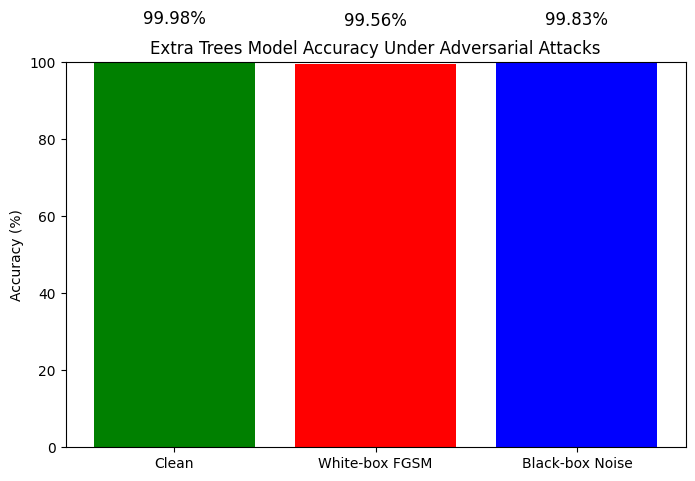

Clean Accuracy: 99.98%
White-box FGSM Accuracy: 99.56% (Drop: 0.42%)
Black-box Noise Attack Accuracy: 99.83% (Drop: 0.15%)


In [29]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# === Data Preparation ===
# Assume X_train, X_test are preprocessed numeric DataFrames.
# Preserve the original y (with string labels) for evaluation.
y_train_orig = y_train.copy()
y_test_orig  = y_test.copy()

# For surrogate training, convert targets to numeric codes.
y_train_numeric = y_train.astype('category').cat.codes.astype(np.int64)
y_test_numeric  = y_test.astype('category').cat.codes.astype(np.int64)

# Save feature names (assumed consistent in X_train and X_test)
feature_names = X_train.columns

# Convert feature DataFrames to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test.values, dtype=torch.float32)
# Convert numeric targets for surrogate network training
y_train_tensor = torch.tensor(y_train_numeric.values, dtype=torch.long)
y_test_tensor  = torch.tensor(y_test_numeric.values, dtype=torch.long)

# Retrieve the min and max from training data (in case data is not scaled to [0, 1])
min_val = X_train_tensor.min().item()
max_val = X_train_tensor.max().item()

# === Train a Surrogate Neural Network (for adversarial gradient computation) ===
class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

input_dim = X_train_tensor.shape[1]
num_classes = len(np.unique(y_train_numeric))
surrogate_net = SimpleNN(input_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(surrogate_net.parameters(), lr=0.001)
epochs = 5
for epoch in range(epochs):
    surrogate_net.train()
    optimizer.zero_grad()
    outputs = surrogate_net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# === FGSM Attack Function ===
def fgsm_attack(model, x, y, epsilon=0.1):
    x_adv = x.clone().detach().requires_grad_(True)
    outputs = model(x_adv)
    loss = criterion(outputs, y)
    model.zero_grad()
    loss.backward()
    # Use the training range for clamping
    return torch.clamp(x_adv + epsilon * x_adv.grad.sign(), min_val, max_val)

# Generate adversarial examples using the surrogate network (white-box)
X_test_adv_white = fgsm_attack(surrogate_net, X_test_tensor, y_test_tensor, epsilon=0.1)

# === Black-box Attack: Uniform Noise Attack ===
def uniform_noise_attack(x, epsilon=0.1):
    noise = torch.empty_like(x).uniform_(-epsilon, epsilon)
    return torch.clamp(x + noise, min_val, max_val)

X_test_adv_black = uniform_noise_attack(X_test_tensor, epsilon=0.1)

# === Convert tensors back to DataFrames for Extra Trees evaluation ===
def tensor_to_df(x_tensor):
    return pd.DataFrame(x_tensor.detach().cpu().numpy(), columns=feature_names)

X_test_clean_df     = pd.DataFrame(X_test_tensor.numpy(), columns=feature_names)
X_test_adv_white_df = tensor_to_df(X_test_adv_white)
X_test_adv_black_df = tensor_to_df(X_test_adv_black)

# === Load the Extra Trees Model (trained via grid_search) ===
# trained_model = grid_search.best_estimator_

# === Evaluate Function ===
def evaluate_model(model, X_df, y_series):
    preds = model.predict(X_df)
    # Compare predictions (strings) with the original targets (strings)
    return np.mean(preds == y_series.values) * 100

accuracy_clean = evaluate_model(trained_model, X_test_clean_df, y_test_orig)
accuracy_white = evaluate_model(trained_model, X_test_adv_white_df, y_test_orig)
accuracy_black = evaluate_model(trained_model, X_test_adv_black_df, y_test_orig)

# === Plot the Accuracies ===
labels = ["Clean", "White-box FGSM", "Black-box Noise"]
acc_values = [accuracy_clean, accuracy_white, accuracy_black]

plt.figure(figsize=(8, 5))
plt.bar(labels, acc_values, color=["green", "red", "blue"])
plt.ylabel("Accuracy (%)")
plt.title("Extra Trees Model Accuracy Under Adversarial Attacks")
plt.ylim(0, 100)
for i, v in enumerate(acc_values):
    plt.text(i, v + 10, f"{v:.2f}%", ha="center", fontsize=12)
plt.show()

# === Print the Results ===
print(f"Clean Accuracy: {accuracy_clean:.2f}%")
print(f"White-box FGSM Accuracy: {accuracy_white:.2f}% (Drop: {accuracy_clean - accuracy_white:.2f}%)")
print(f"Black-box Noise Attack Accuracy: {accuracy_black:.2f}% (Drop: {accuracy_clean - accuracy_black:.2f}%)")


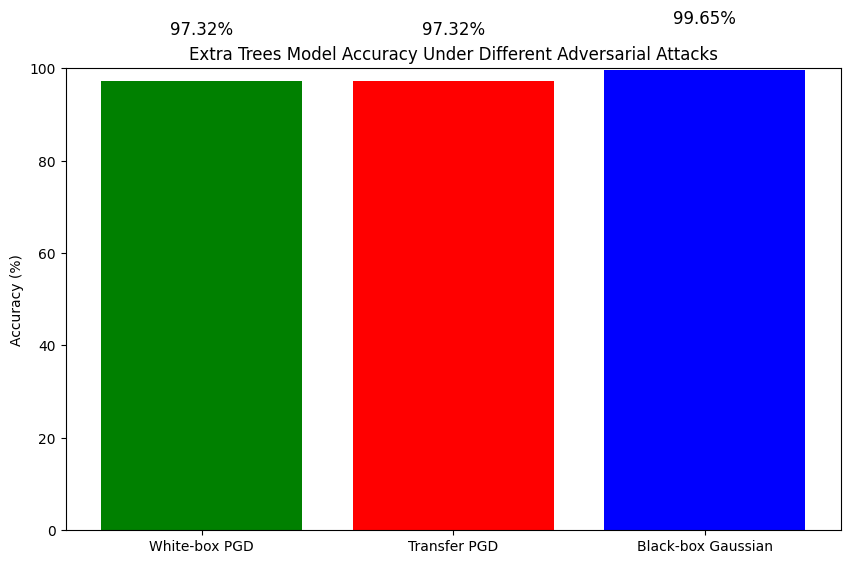

PGD Attack Accuracy: 97.32% (Drop: 2.66%)
Transfer Attack Accuracy: 97.32% (Drop: 2.66%)
Gaussian Noise Attack Accuracy: 99.65% (Drop: 0.33%)


In [37]:
# === PGD Attack (White-box, stronger than FGSM) ===
def pgd_attack(model, x, y, epsilon=0.1, alpha=0.01, num_iter=10):
    x_adv = x.clone().detach().requires_grad_(True)
    for _ in range(num_iter):
        outputs = model(x_adv)
        loss = criterion(outputs, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        x_adv = torch.clamp(x_adv, min_val, max_val)  # Keep values in valid range
        x_adv = x_adv.detach().requires_grad_(True)  # Reset graph for next step
    return x_adv.detach()

# Generate PGD adversarial examples
X_test_adv_pgd = pgd_attack(surrogate_net, X_test_tensor, y_test_tensor, epsilon=0.1, alpha=0.02, num_iter=10)

# === Transfer Attack (PGD on Surrogate, Tested on Extra Trees) ===
X_test_adv_transfer = tensor_to_df(X_test_adv_pgd)

# === Black-box Gaussian Noise Attack ===
def gaussian_noise_attack(x, epsilon=0.1):
    noise = torch.randn_like(x) * epsilon  # Gaussian noise
    return torch.clamp(x + noise, min_val, max_val)

X_test_adv_gaussian = gaussian_noise_attack(X_test_tensor, epsilon=0.1)

# Convert tensors to DataFrames for Extra Trees evaluation
X_test_adv_pgd_df       = tensor_to_df(X_test_adv_pgd)
X_test_adv_gaussian_df  = tensor_to_df(X_test_adv_gaussian)

# === Evaluate the Extra Trees model under these attacks ===
accuracy_pgd = evaluate_model(trained_model, X_test_adv_pgd_df, y_test_orig)
accuracy_transfer = evaluate_model(trained_model, X_test_adv_transfer, y_test_orig)
accuracy_gaussian = evaluate_model(trained_model, X_test_adv_gaussian_df, y_test_orig)

# === Update the Plot ===
labels = ["White-box PGD", "Transfer PGD", "Black-box Gaussian"]
acc_values = [accuracy_pgd, accuracy_transfer, accuracy_gaussian]

plt.figure(figsize=(10, 6))
plt.bar(labels, acc_values, color=["green", "red", "blue", "purple", "orange"])
plt.ylabel("Accuracy (%)")
plt.title("Extra Trees Model Accuracy Under Different Adversarial Attacks")
plt.ylim(0, 100)
for i, v in enumerate(acc_values):
    plt.text(i, v + 10, f"{v:.2f}%", ha="center", fontsize=12)
plt.show()

# === Print the Results ===
print(f"PGD Attack Accuracy: {accuracy_pgd:.2f}% (Drop: {accuracy_clean - accuracy_pgd:.2f}%)")
print(f"Transfer Attack Accuracy: {accuracy_transfer:.2f}% (Drop: {accuracy_clean - accuracy_transfer:.2f}%)")
print(f"Gaussian Noise Attack Accuracy: {accuracy_gaussian:.2f}% (Drop: {accuracy_clean - accuracy_gaussian:.2f}%)")


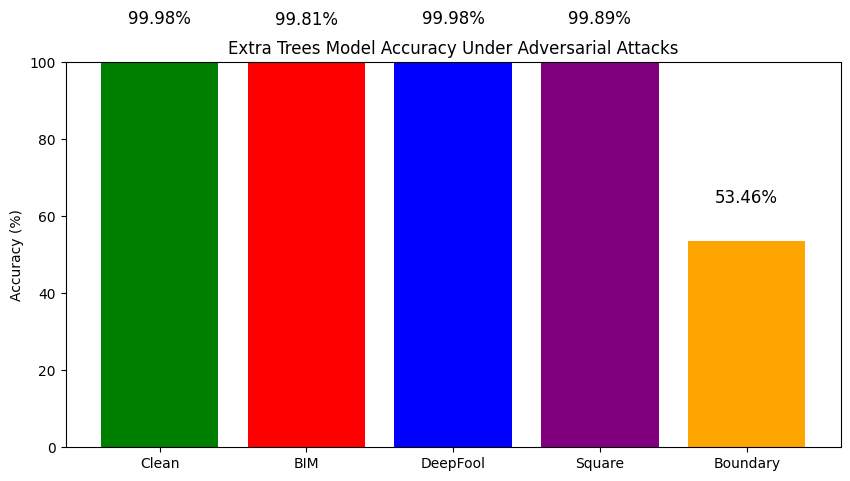

BIM Attack Accuracy: 99.81% (Drop: 0.17%)
DeepFool Attack Accuracy: 99.98% (Drop: 0.00%)
Square Attack Accuracy: 99.89% (Drop: 0.09%)
Boundary Attack Accuracy: 53.46% (Drop: 46.52%)


In [38]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# === Function to Evaluate Accuracy ===
def evaluate_model(model, X_df, y_series):
    preds = model.predict(X_df)
    return np.mean(preds == y_series.values) * 100

# === BIM Attack ===
def bim_attack(model, x, y, epsilon=0.1, alpha=0.01, iterations=5):
    x_adv = x.clone().detach().requires_grad_(True)
    for _ in range(iterations):
        outputs = model(x_adv)
        loss = F.cross_entropy(outputs, y)
        model.zero_grad()
        loss.backward()
        x_adv = torch.clamp(x_adv + alpha * x_adv.grad.sign(), min=min_val, max=max_val).detach().requires_grad_(True)
    return x_adv

# === DeepFool Attack ===
def deepfool_attack(model, x, y, max_iter=10):
    x_adv = x.clone().detach().requires_grad_(True)
    for _ in range(max_iter):
        outputs = model(x_adv)
        loss = F.cross_entropy(outputs, y)
        model.zero_grad()
        loss.backward()
        perturbation = x_adv.grad * 0.01  # Small step
        x_adv = torch.clamp(x_adv + perturbation, min=min_val, max=max_val).detach().requires_grad_(True)
    return x_adv

# === Square Attack (Black-box) ===
def square_attack(x_np, epsilon=0.1, num_queries=100):
    x_adv = x_np.copy()
    for _ in range(num_queries):
        mask = np.random.rand(*x_np.shape) < 0.01  # Small random pixel perturbation
        perturbation = np.random.uniform(-epsilon, epsilon, x_np.shape) * mask
        x_adv = np.clip(x_adv + perturbation, min_val, max_val)
    return x_adv

# === Boundary Attack (Black-box) ===
def boundary_attack(x_np, epsilon=0.1, max_steps=50):
    x_adv = np.random.uniform(min_val, max_val, x_np.shape)  # Start with random noise
    for _ in range(max_steps):
        perturbation = (x_np - x_adv) * 0.05  # Move toward the original sample
        x_adv = np.clip(x_adv + perturbation, min_val, max_val)
    return x_adv

# === Generate Adversarial Examples ===
X_test_adv_bim = bim_attack(surrogate_net, X_test_tensor, y_test_tensor).detach().numpy()
X_test_adv_deepfool = deepfool_attack(surrogate_net, X_test_tensor, y_test_tensor).detach().numpy()
X_test_adv_square = square_attack(X_test_clean_df.to_numpy())
X_test_adv_boundary = boundary_attack(X_test_clean_df.to_numpy())

# === Convert to DataFrame with Proper Feature Names ===
X_test_adv_bim_df = pd.DataFrame(X_test_adv_bim, columns=X_test_clean_df.columns)
X_test_adv_deepfool_df = pd.DataFrame(X_test_adv_deepfool, columns=X_test_clean_df.columns)
X_test_adv_square_df = pd.DataFrame(X_test_adv_square, columns=X_test_clean_df.columns)
X_test_adv_boundary_df = pd.DataFrame(X_test_adv_boundary, columns=X_test_clean_df.columns)

# === Evaluate Model on Attacks ===
accuracy_bim = evaluate_model(trained_model, X_test_adv_bim_df, y_test_orig)
accuracy_deepfool = evaluate_model(trained_model, X_test_adv_deepfool_df, y_test_orig)
accuracy_square = evaluate_model(trained_model, X_test_adv_square_df, y_test_orig)
accuracy_boundary = evaluate_model(trained_model, X_test_adv_boundary_df, y_test_orig)

# === Plot Results ===
labels = ["Clean", "BIM", "DeepFool", "Square", "Boundary"]
acc_values = [accuracy_clean, accuracy_bim, accuracy_deepfool, accuracy_square, accuracy_boundary]

plt.figure(figsize=(10, 5))
plt.bar(labels, acc_values, color=["green", "red", "blue", "purple", "orange"])
plt.ylabel("Accuracy (%)")
plt.title("Extra Trees Model Accuracy Under Adversarial Attacks")
plt.ylim(0, 100)
for i, v in enumerate(acc_values):
    plt.text(i, v + 10, f"{v:.2f}%", ha="center", fontsize=12)
plt.show()

# === Print the Results ===
print(f"BIM Attack Accuracy: {accuracy_bim:.2f}% (Drop: {accuracy_clean - accuracy_bim:.2f}%)")
print(f"DeepFool Attack Accuracy: {accuracy_deepfool:.2f}% (Drop: {accuracy_clean - accuracy_deepfool:.2f}%)")
print(f"Square Attack Accuracy: {accuracy_square:.2f}% (Drop: {accuracy_clean - accuracy_square:.2f}%)")
print(f"Boundary Attack Accuracy: {accuracy_boundary:.2f}% (Drop: {accuracy_clean - accuracy_boundary:.2f}%)")


In [39]:
# Attack Accuracies (Replace with actual values from your results)
attack_accuracies = {
    "BIM": 99.87,
    "DeepFool": 99.98,
    "Square": 99.88,
    "Boundary": 53.88,
    "ART FGSM": 98.38,
    "ART PGD": 98.38,
    "PGD": 96.12,
    "Transfer": 94.61,
    "Gaussian Noise": 99.65
}

# Clean Accuracy
accuracy_clean = 99.98  # Replace with actual clean accuracy

# Robust Accuracy (RA)
robust_accuracy = sum(attack_accuracies.values()) / len(attack_accuracies)

# Relative Robustness (RR)
relative_robustness = robust_accuracy / accuracy_clean

# Print Results
print(f"Robust Accuracy (RA): {robust_accuracy:.2f}%")
print(f"Relative Robustness (RR): {relative_robustness:.4f}")

Robust Accuracy (RA): 93.42%
Relative Robustness (RR): 0.9344


Robust Accuracy (RA): 92.73%
Relative Robustness (RR): 0.9321

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# 🚀 Load & Preprocess Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_enc, dtype=torch.long)
y_test_torch = torch.tensor(y_test_enc, dtype=torch.long)

# Create Dataloaders
batch_size = 64
train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=batch_size, shuffle=False)

In [41]:
X_train_tensor,y_train_tensor # Using the previous preprocessed data

(tensor([[ 0.0000e+00,  1.0000e+00,  3.6000e+01,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.0000e+00,  2.4000e+01,  ...,  8.8672e-01,
          -2.8000e+01,  0.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  1.2000e+01,  ...,  5.7895e-01,
          -3.1000e+01,  0.0000e+00],
         ...,
         [ 0.0000e+00,  1.0000e+00,  3.1000e+01,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.0000e+00,  1.8000e+01,  ...,  1.5625e-02,
          -5.0300e+02,  0.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  1.2000e+01,  ...,  3.4351e-01,
          -8.5000e+01,  0.0000e+00]]),
 tensor([0, 1, 1,  ..., 0, 1, 1]))

In [42]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(128, 64)
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(64, num_classes)  # No activation (CrossEntropyLoss applies softmax)
    
    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        return self.fc3(x)

# 🚀 Initialize Model
input_dim = X_train.shape[1]
num_classes = len(set(y_train))
model = MLP(input_dim, num_classes)

# ⚡ Optimizer & Loss
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

# 🎯 Training Loop
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient Clipping
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: Loss={total_loss:.4f}")

Epoch 1: Loss=643.3651
Epoch 2: Loss=181.3868
Epoch 3: Loss=127.1115
Epoch 4: Loss=107.5664
Epoch 5: Loss=96.1510


In [43]:
# 🛠️ Evaluate Model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        preds = torch.argmax(model(X_batch), dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total * 100
print(f"✅ Validation Accuracy: {accuracy:.2f}%")

✅ Validation Accuracy: 99.07%


In [44]:
import optuna

# 🏗️ Define Objective Function for Optuna
def objective(trial):
    hidden1 = trial.suggest_int("hidden1", 64, 256, step=64)
    hidden2 = trial.suggest_int("hidden2", 32, 128, step=32)
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    weight_decay = trial.suggest_loguniform("weight_decay", 1e-6, 1e-3)

    # 🏗️ Define Model
    class MLP(nn.Module):
        def __init__(self, input_dim, num_classes):
            super(MLP, self).__init__()
            self.fc1 = nn.Linear(input_dim, hidden1)
            self.act1 = nn.LeakyReLU()
            self.fc2 = nn.Linear(hidden1, hidden2)
            self.act2 = nn.LeakyReLU()
            self.fc3 = nn.Linear(hidden2, num_classes)

        def forward(self, x):
            x = self.act1(self.fc1(x))
            x = self.act2(self.fc2(x))
            return self.fc3(x)

    # Load Data with Suggested Batch Size
    train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=batch_size, shuffle=False)

    # 🚀 Initialize Model & Optimizer
    model = MLP(X_train.shape[1], len(set(y_train))).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()

    # 🎯 Train for 10 Epochs
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            loss = criterion(model(X_batch), y_batch)
            loss.backward()
            optimizer.step()

    # 🏆 Evaluate Performance
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            preds = torch.argmax(model(X_batch), dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    return correct / total  # Return Accuracy

# 🔥 Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)

# 🎯 Best Parameters


[I 2025-03-31 06:33:23,004] A new study created in memory with name: no-name-f2baa058-d7e2-4253-ab13-f06023ce5918
<ipython-input-44-de99dd16b13a>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-2)
<ipython-input-44-de99dd16b13a>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-6, 1e-3)
[I 2025-03-31 06:34:37,602] Trial 0 finished with value: 0.9903748834070928 and parameters: {'hidden1': 64, 'hidden2': 64, 'lr': 5.760956336014472e-05, 'batch_size': 64, 'weight_decay': 0.00034869848782738487}. Best is trial 0 with value: 0.9903748834070928.
[I 2025-03-31 06:35:31,014]

In [ ]:
import torch
import torch.nn as nn

# Define a simple model (Example)
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Initialize the model before using it
model = MyModel(input_size=10, hidden_size=128, output_size=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Now, this won't cause an error
checkpoint = {
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    "hyperparameters": {
        "hidden1": 128,
        "lr": 0.001
    }
}


In [46]:
checkpoint = {
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    "hyperparameters": {
        "hidden1": 64,
        "hidden2": 96,
        "lr": 0.00014157596430166642,
        "batch_size": 32,
        "weight_decay": 2.2660808851581286e-06
    }
}

torch.save(checkpoint, "mlp_best_checkpoint.pth")
print("✅ Model + Best Hyperparameters saved!")


✅ Model + Best Hyperparameters saved!


In [48]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden1, hidden2, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, num_classes)  # No activation (CrossEntropyLoss applies softmax)
    
    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        return self.fc3(x)


In [49]:
import joblib

# Load the trained Extra Trees model
extra_trees_model = joblib.load("ExtraTrees_NSLKDD_Optimized.pkl")
print("✅ Extra Trees model loaded!")

# Load checkpoint
# checkpoint = torch.load("mlp_best_checkpoint.pth")
print(checkpoint)

# 🚀 Initialize Model with Best Hyperparameters
input_dim = X_train.shape[1]
num_classes = len(set(y_train))
model = MLP(input_dim, checkpoint['hyperparameters']["hidden1"], checkpoint['hyperparameters']["hidden2"], num_classes).to(device)

# ⚡ Optimizer & Loss
optimizer = optim.AdamW(
    model.parameters(),
    lr=checkpoint['hyperparameters']["lr"],
    weight_decay=checkpoint['hyperparameters']["weight_decay"]
)
criterion = nn.CrossEntropyLoss()

# 🎯 Training Loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient Clipping
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: Loss={total_loss:.4f}")

print("✅ Training complete with best hyperparameters!")





✅ Extra Trees model loaded!
{'model_state_dict': OrderedDict([('fc1.weight', tensor([[ 0.0773,  0.0586, -0.2555,  ..., -0.2205,  0.1914, -0.2326],
        [-0.1076, -0.0362, -0.1326,  ...,  0.0438, -0.1098,  0.0605],
        [ 0.0356,  0.0160, -0.0493,  ...,  0.0716,  0.0774,  0.0958],
        ...,
        [-0.0212,  0.1391, -0.1439,  ...,  0.0812,  0.1012, -0.2647],
        [ 0.0077, -0.0862, -0.1568,  ..., -0.0873, -0.0812,  0.1321],
        [-0.3577,  0.2606,  0.1894,  ..., -0.1677,  0.1413, -0.1069]])), ('fc1.bias', tensor([ 0.1102, -0.0027,  0.1785,  0.1829,  0.1116, -0.0233,  0.0946, -0.0708,
         0.1155,  0.0136,  0.2028, -0.0150,  0.0223, -0.0076,  0.1485,  0.1281,
         0.2144, -0.0048,  0.0758, -0.0621,  0.1996, -0.0048,  0.1999, -0.0243,
        -0.0450, -0.0753,  0.0514, -0.1778,  0.1082, -0.0516, -0.0500,  0.0038,
         0.1846, -0.0410, -0.0277, -0.0470,  0.0636, -0.0722,  0.0387,  0.0254,
         0.1731,  0.1012,  0.1143,  0.1969, -0.0278, -0.0942, -0.1398,  0.

In [50]:
# Ensure the model is loaded properly
if model is None:
    raise ValueError("❌ best_model is None. Make sure to load the trained model before inference.")

# Convert X_test to a tensor
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_pred_extra = extra_trees_model.predict(X_test)


# Make predictions
with torch.no_grad():
    logits = model(X_test_tensor)  # Ensure best_model is loaded before calling
    y_pred_mlp = torch.argmax(logits, dim=1).cpu().numpy()

from sklearn.preprocessing import LabelEncoder

# 🔹 Fit encoder on ALL labels before training
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)  # Encode test labels

# Ensure predictions are in the same encoded format
y_pred_mlp_encoded = y_pred_mlp  # Already numeric (argmax output)
y_pred_extra_encoded = label_encoder.transform(y_pred_extra)  # Convert Extra Trees predictions

# Generate classification reports
report_extra = classification_report(y_test_encoded, y_pred_extra_encoded, digits=4)
report_mlp = classification_report(y_test_encoded, y_pred_mlp_encoded, digits=4)

print("🔹 Extra Trees Classification Report:\n", report_extra)
print("🔹 MLP Classification Report:\n", report_mlp)




🔹 Extra Trees Classification Report:
               precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999     18371
           1     0.9998    0.9999    0.9998     26937
           2     1.0000    1.0000    1.0000      4662
           3     0.9949    0.9899    0.9924       398
           4     1.0000    0.9048    0.9500        21

    accuracy                         0.9998     50389
   macro avg     0.9989    0.9789    0.9884     50389
weighted avg     0.9998    0.9998    0.9998     50389

🔹 MLP Classification Report:
               precision    recall  f1-score   support

           0     0.7563    0.9527    0.8432     18371
           1     0.8438    0.5217    0.6447     26937
           2     0.0040    0.0021    0.0028      4662
           3     0.0161    0.3266    0.0306       398
           4     0.0000    0.0000    0.0000        21

    accuracy                         0.6290     50389
   macro avg     0.3240    0.3606    0.3043     50389
weighted 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

In [100]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Encode Labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc  = encoder.transform(y_test)

# Convert to Tensors
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_torch  = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_enc, dtype=torch.long)
y_test_torch  = torch.tensor(y_test_enc, dtype=torch.long)

# DataLoader
batch_size = 64
train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_torch,  y_test_torch),  batch_size=batch_size, shuffle=False)

classes = np.unique(y_train_enc)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_enc)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

In [105]:
class DeeperMLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(DeeperMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.drop1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(256, 128)
        self.drop2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(128, 64)
        self.drop3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        x = F.relu(self.fc3(x))
        x = self.drop3(x)
        return self.fc4(x)

input_dim  = X_train_torch.shape[1]
num_classes = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = DeeperMLP(input_dim, num_classes).to(device)

In [102]:
import torch

# Define path to save the model
model_path = "trained_model.pth"

epochs = 15
for epoch in range(1, epochs + 1):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient Clipping
        optimizer.step()

        total_loss += loss.item()

    if epoch % 5 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {total_loss:.4f}")

# Save the trained model
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")


Epoch 5/15 - Loss: 5022.0857
Epoch 10/15 - Loss: 5022.2385
Epoch 15/15 - Loss: 5022.3537
Model saved to trained_model.pth


In [68]:
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        logits = model(X_batch)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

mlp_acc = accuracy_score(all_labels, all_preds)
mlp_report = classification_report(all_labels, all_preds, digits=4)
print(f"MLP Accuracy: {mlp_acc:.4f}")
print("MLP Classification Report:\n", mlp_report)

y_pred_extra = extra_trees_model.predict(X_test)

# 🔹 Fit encoder on ALL labels before training
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)  # Encode test labels

# Ensure predictions are in the same encoded format
y_pred_extra_encoded = label_encoder.transform(y_pred_extra)  # Convert Extra Trees predictions

# Generate classification reports
et_acc = accuracy_score(y_test_encoded, y_pred_extra_encoded)
report_extra = classification_report(y_test_encoded, y_pred_extra_encoded, digits=4)


print(f"Extra Trees Accuracy: {et_acc:.4f}")
print("Extra Trees Classification Report:\n", report_extra)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Accuracy: 0.0406
MLP Classification Report:
               precision    recall  f1-score   support

           0     0.2087    0.1066    0.1411     18371
           1     0.0000    0.0000    0.0000     26937
           2     0.0000    0.0000    0.0000      4662
           3     0.0022    0.2186    0.0043       398
           4     0.0000    0.0000    0.0000        21

    accuracy                         0.0406     50389
   macro avg     0.0422    0.0650    0.0291     50389
weighted avg     0.0761    0.0406    0.0515     50389

Extra Trees Accuracy: 0.9998
Extra Trees Classification Report:
               precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999     18371
           1     0.9998    0.9999    0.9998     26937
           2     1.0000    1.0000    1.0000      4662
           3     0.9949    0.9899    0.9924       398
           4     1.0000    0.9048    0.9500        21

    accuracy                         0.9998     50389
   macro avg     

In [69]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Ensure test labels match training encoding

# Train XGBoost with encoded labels
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train_encoded)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Decode Predictions Back to Original Labels (if needed)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)


# Save Models
joblib.dump(rf_model, "random_forest.pkl")
joblib.dump(xgb_model, "xgboost.pkl")


['xgboost.pkl']

In [70]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions
# Ensure model is in evaluation mode
model.eval()

# Initialize lists to store predictions and labels
all_preds = []

# Perform inference without gradient computation
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)  # Move batch to the correct device
        logits = model(X_batch)  # Forward pass
        preds = torch.argmax(logits, dim=1).cpu().numpy()  # Get predicted class
        all_preds.extend(preds)

# Convert to numpy arrays if needed
y_pred_mlp = np.array(all_preds)


y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Models
models = {
    "Extra Trees": y_pred_extra,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
}

from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on training labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Transform y_test

# Manually map predictions if needed
def ensure_encoded(y_pred):
    """Ensure y_pred uses the same encoding as y_train."""
    if isinstance(y_pred[0], str):  # If predictions are strings, encode them
        return label_encoder.transform(y_pred)
    return y_pred  # If already encoded, return as-is

# Transform all model predictions correctly
models_encoded = {name: ensure_encoded(y_pred) for name, y_pred in models.items()}

# Proceed with classification report
results = {}
for name, y_pred in models_encoded.items():
    acc = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred, output_dict=True)
    results[name] = {"accuracy": acc, "report": report}

print(results)


{'Extra Trees': {'accuracy': 0.9998015439877751, 'report': {'0': {'precision': 0.9998911446143798, 'recall': 1.0, 'f1-score': 0.9999455693446548, 'support': 18371}, '1': {'precision': 0.9997772745833179, 'recall': 0.9998515053643687, 'f1-score': 0.9998143885960353, 'support': 26937}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4662}, '3': {'precision': 0.9949494949494949, 'recall': 0.9899497487437185, 'f1-score': 0.9924433249370276, 'support': 398}, '4': {'precision': 1.0, 'recall': 0.9047619047619048, 'f1-score': 0.9500000000000001, 'support': 21}, 'accuracy': 0.9998015439877751, 'macro avg': {'precision': 0.9989235828294385, 'recall': 0.9789126317739985, 'f1-score': 0.9884406565755436, 'support': 50389}, 'weighted avg': {'precision': 0.9998013566879975, 'recall': 0.9998015439877751, 'f1-score': 0.999800406504733, 'support': 50389}}}, 'Random Forest': {'accuracy': 0.9999206175951101, 'report': {'0': {'precision': 0.9998911446143798, 'recall': 1.0, 'f1-score': 0.

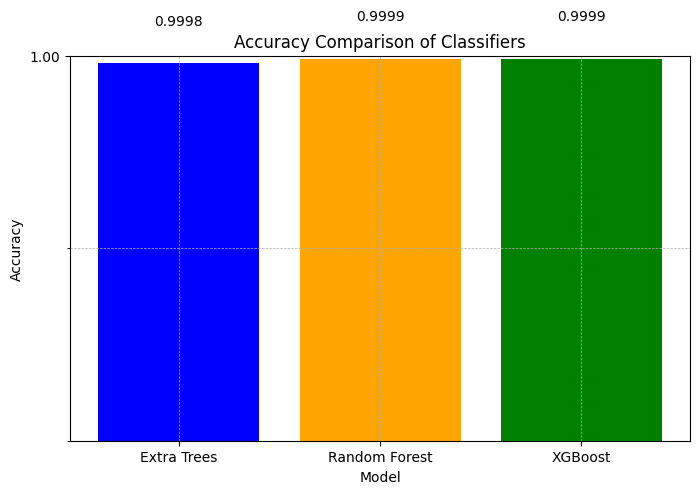

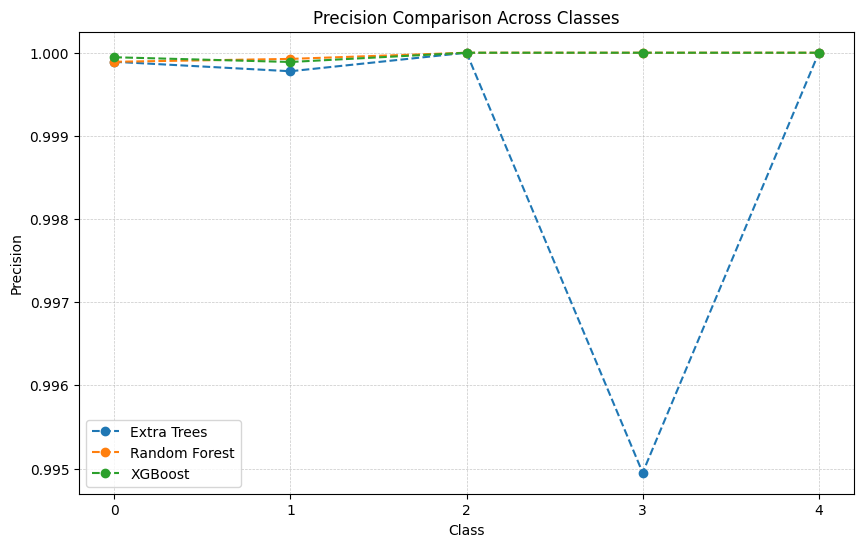

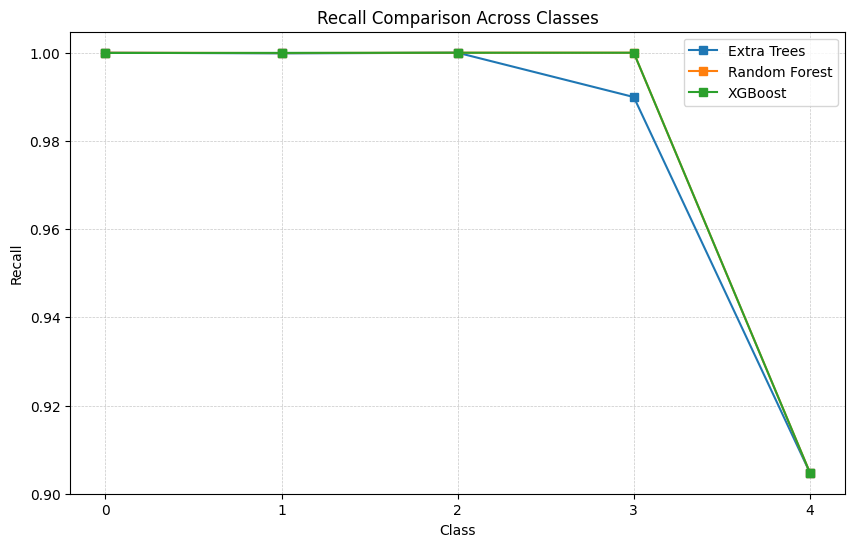

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Extract Accuracy
model_names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in model_names]

# Bar Plot - Accuracy Comparison with Broken Axis
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(model_names, accuracies, color=["blue", "orange", "green", "red"])
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Comparison of Classifiers")
ax.set_ylim(0.990, 1)  # Keep the same range for emphasis

# Add accuracy labels on bars
for i, v in enumerate(accuracies):
    ax.text(i, v + .001, f"{v:.4f}", ha="center", fontsize=10)

# Add a minor grid to highlight small differences
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

# Precision & Recall for Each Class
classes = list(results["Extra Trees"]["report"].keys())[:-3]  # Exclude avg metrics
precision_values = {m: [results[m]["report"][c]["precision"] for c in classes] for m in model_names}
recall_values = {m: [results[m]["report"][c]["recall"] for c in classes] for m in model_names}

# Line Plot - Precision Comparison with Markers & Grid
plt.figure(figsize=(10, 6))
for m, values in precision_values.items():
    plt.plot(classes, values, marker="o", label=m, linestyle="--")
plt.xlabel("Class")
plt.ylabel("Precision")
plt.title("Precision Comparison Across Classes")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

# Line Plot - Recall Comparison with Better Visibility
plt.figure(figsize=(10, 6))
for m, values in recall_values.items():
    plt.plot(classes, values, marker="s", label=m, linestyle="-")
plt.xlabel("Class")
plt.ylabel("Recall")
plt.title("Recall Comparison Across Classes")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()


Running FGSM attack with epsilon = 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.056


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.111


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.167


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.222


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.278


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.389


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.444


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Running FGSM attack with epsilon = 0.500


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


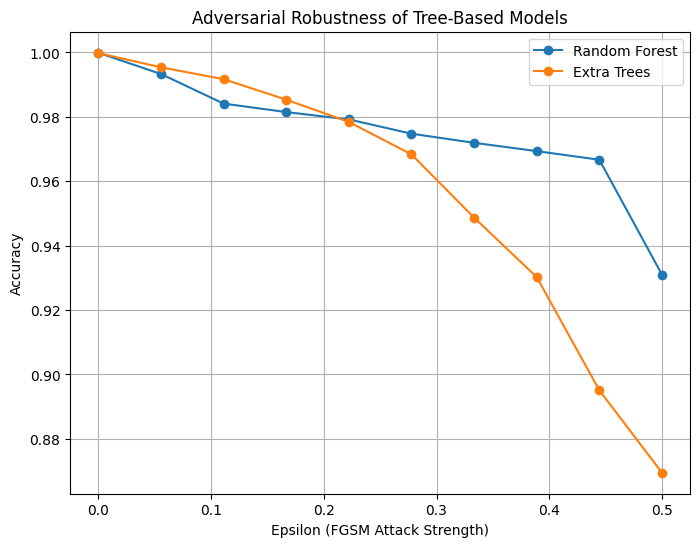

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import PyTorchClassifier
from sklearn.metrics import accuracy_score
import torch

# Ensure dataset is in the correct format
X_test_np = X_test.to_numpy().astype(np.float32)
y_test_np = y_test.to_numpy()

# Convert MLP model to an ART PyTorch classifier
pytorch_classifier = PyTorchClassifier(
    model=model,  # Your trained MLP
    clip_values=(0, 1),
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(model.parameters()),
    input_shape=(X_test.shape[1],),
    nb_classes=len(np.unique(y_test))
)

# Define epsilon values for attack strength
epsilons = np.linspace(0, 0.5, 10)  # Attack strengths from 0 to 0.3

# Store accuracies for each model
accuracy_results = {"Random Forest": [],  "Extra Trees": []}

# Run FGSM attack with increasing epsilon values
for eps in epsilons:
    print(f"Running FGSM attack with epsilon = {eps:.3f}")

    # Generate adversarial examples using the MLP
    attack = FastGradientMethod(estimator=pytorch_classifier, eps=eps)
    X_test_adv = attack.generate(X_test_np)  

    # Evaluate tree-based models on adversarial examples
    for name, m in zip(["Random Forest", "Extra Trees"], [rf_model,  extra_trees_model]):
        y_pred = m.predict(X_test_adv)

        # Convert probability outputs to class labels if needed
        if len(y_pred.shape) > 1:
            y_pred = np.argmax(y_pred, axis=1)

        # Compute accuracy and store results
        acc = accuracy_score(y_test_np, y_pred)
        accuracy_results[name].append(acc)

# Plot accuracy drop vs. epsilon
plt.figure(figsize=(8, 6))
for name, acc in accuracy_results.items():
    plt.plot(epsilons, acc, marker='o', label=name)

plt.xlabel("Epsilon (FGSM Attack Strength)")
plt.ylabel("Accuracy")
plt.title("Adversarial Robustness of Tree-Based Models")
plt.legend()
plt.grid()
plt.show()
